In [1]:
##
#The simple example for 3-node coupled system by CIC
import torch
from utils import logistic_3_system,plot_score_matrix,plot_annot_square,find_differences
import torch
from CIC import CIC
import os
from Compare import main_methods,compare_methods
import matplotlib.pyplot as plt


In [2]:

#Parameters about data generations
noise=0.001
beta = 0.35
num_steps = 1000
#Parameters about model
xy_dim=12 #embedding dimension of the time series
z_dim=6 #dimension of latent variables
hid_dim=128 #dimension of hidden layyers
#Data simulations for System 1:x->y
data=logistic_3_system(rx=3.7, ry= 3.72, rw=3.78, noise=0.005, betaxy= 0, betaxz=0, betayx=0.35, betayz=0, num_steps=5000)
#Ground truth:1 represents the causality; 2 represents that there are confouders for coresponding variables.
Net_ground= torch.tensor([[0, 1, 0],
              [0, 0, 0],
              [0, 0, 0]])
#Weight
weights = torch.tensor([0.35, 0.35, 0.09, 0.09, 0.28,0.001,0.001]) #Users can fine-tune the weight according to data.
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#Causality inference by CIC
out_s, causal_index, Net_causal=CIC(data,weights,xy_dim,z_dim,hid_dim,embedding_dim=xy_dim,time_delay=1,T=1,num_epochs=50,device=device)
print("Net_causal:",Net_causal)


Net_causal: tensor([[0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


method GC complete!
method TE complete!
method CCM complete!
method PCM complete!
method CME complete!
method DCME complete!
method CMC complete!
method DCMC complete!


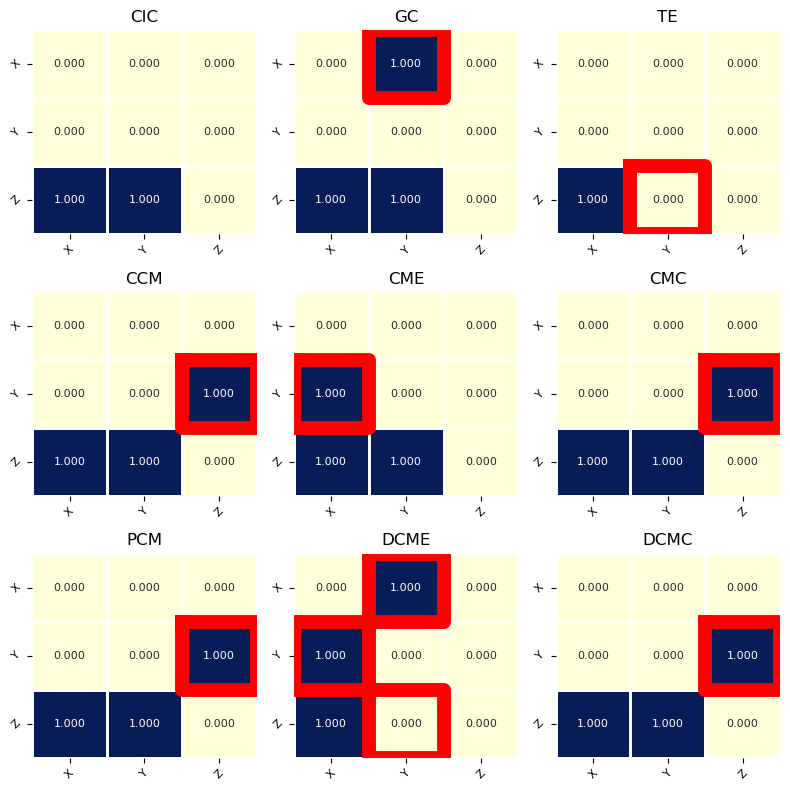

In [4]:

##Compare with other causal methods
#create folders for store result of these method: GC, TE, CCM, CME, CMC, PCM, DCME and DCMC
res_dir = f'/.../logistic3/case1/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

Net1=torch.where(Net_causal == 2, 0, Net_causal)
Net_ground1=torch.where(Net_ground == 2, 0, Net_ground)
method_Net_scores=main_methods(data,res_dir,embed_dim=xy_dim,n_neighbor=3,n_excluded = 0)
TP, FP, TN, FN, FPR, TPR, Precision0, Precision1, Recall0, Recall1, Accuracy, roc_auc,methods,CauNet_diff8,Causal_diff8,thrs=compare_methods(res_dir,Net_ground1,causal_index, Net1,num=5)

#causal inference result 
import numpy as np
Net_ground1=torch.where(Net_ground == 2, 0, Net_ground)
labels = ['X', 'Y', 'Z']
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
ax = ax.flatten()
for i, method in enumerate(methods):
    mat = CauNet_diff8[f"X{i}"]
    ax[i] = plot_score_matrix(mat, cbar=False, labels=labels, fontsize=8, ticklabel_rotation=45, annot=True, ax=ax[i])
    ax[i].set_title(method)
    false_pos=find_differences(mat,Net_ground1)
    plot_annot_square(false_pos, ax=ax[i], c='r', lw=10)

In [3]:

#Data simulations for System 3:z->x & z->y (z is a confounder of x and y)
data=logistic_3_system(rx=3.7, ry= 3.72, rw=3.78, noise=0.005, betaxy= 0, betaxz=0.35, betayx=0, betayz=0.35, num_steps=5000)
#Ground truth
#1 represents the causality; 
#2 represents that there are confouders for coresponding variables,such as confounder of node 1 and node 2.
Net_ground= torch.tensor([[0, 2, 0],
              [2, 0, 0],
              [1, 1, 0]])
weights = torch.tensor([0.35, 0.35, 0.09, 0.09, 0.28,0.001,0.001])
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
out_s, causal_index, Net_causal=CIC(data,weights,xy_dim,z_dim,hid_dim,embedding_dim=xy_dim,time_delay=1,T=1,num_epochs=50,device=device)
print("Net_causal:",Net_causal)

Net_causal: tensor([[0., 2., 0.],
        [2., 0., 0.],
        [1., 1., 0.]])


method GC complete!
method TE complete!
method CCM complete!
method PCM complete!
method CME complete!
method DCME complete!
method CMC complete!
method DCMC complete!


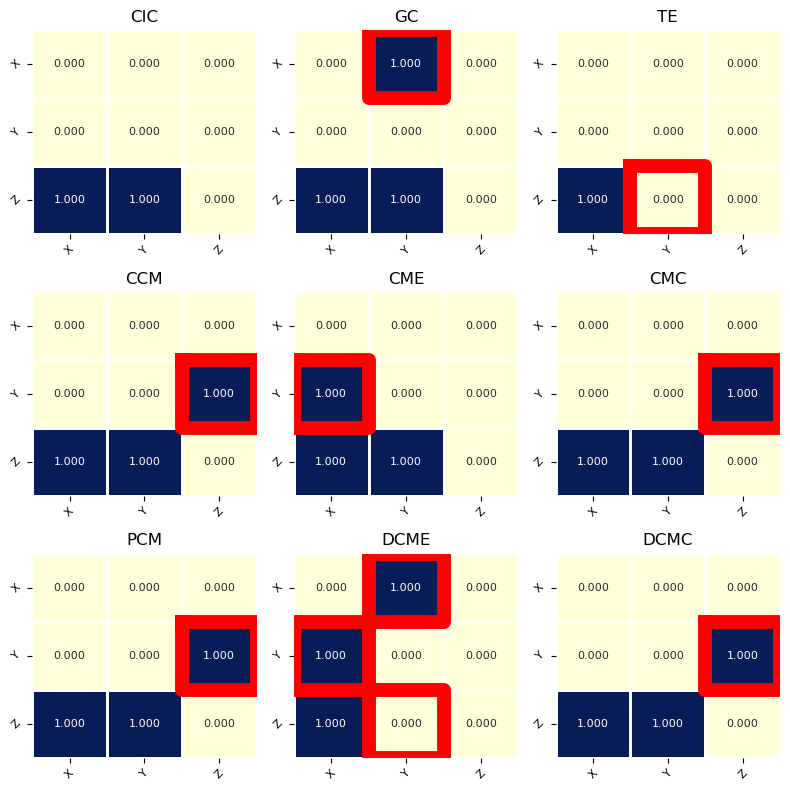

In [5]:
##Compare with other causal methods
res_dir = f'/home/disk1/yanjinling/Documents/Python/code_routine/result_diffmethods/logistic3/case1/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

Net1=torch.where(Net_causal == 2, 0, Net_causal)
Net_ground1=torch.where(Net_ground == 2, 0, Net_ground)
method_Net_scores=main_methods(data,res_dir,embed_dim=xy_dim,n_neighbor=3,n_excluded = 0)
TP, FP, TN, FN, FPR, TPR, Precision0, Precision1, Recall0, Recall1, Accuracy,  roc_auc,methods,CauNet_diff8,Causal_diff8,thrs=compare_methods(res_dir,Net_ground1,causal_index, Net1,num=5)

import numpy as np
Net_ground1=torch.where(Net_ground == 2, 0, Net_ground)
labels = ['X', 'Y', 'Z']
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
ax = ax.flatten()
for i, method in enumerate(methods):
    mat = CauNet_diff8[f"X{i}"]
    ax[i] = plot_score_matrix(mat, cbar=False, labels=labels, fontsize=8, ticklabel_rotation=45, annot=True, ax=ax[i])
    ax[i].set_title(method)
    false_pos=find_differences(mat,Net_ground1)
    plot_annot_square(false_pos, ax=ax[i], c='r', lw=10)